## Measuing Churn Rate

* Churn is the rate of loss of users
* It is, in a sense, the opposite of retention
* It doesnt exist instantaneously, is rather a variable defined over a finite $\Delta t$ in the past.
* WLOG can let $\Delta t=30$ days
* Then churn rate is given in each infintesimal timeslice $dt$ (can be as small as wish but can also let $dt=1$ Day, etc, as the count of users $U_{lost}$ who havent used the app in the past $\Delta t$ divided by total count of users $U_{initial}$ at the beginning of the time period beginning at now minus 30 days or $t - \Delta t$ and ending now.  

$U_{initial} = U_{total, t-\Delta t}$ 

where all of the lost users are contained in the set of users at $t-\Delta t$

$\{ U_{lost}\} \subset \{ U_{initial} \} = \{U_{total, t-\Delta t} \}$ 

Let the size of the set $\{ A \} = | A | $. The churn rate  $\eta$ is given by

$ \eta = \frac{|U_{lost}|}{|U_{initial}|} = \frac{|U_{initial} - U_{now} |} { |U_{initial} |}$



* So for example, let $\Delta t= 30$ days and $dt = 1$ day. Then the churn rate on december 20th is given by the following routine:

1. Compute the number of users in the user pool on November 20
2. Compute the number of users whose last day of use was November 20
3. Divide them

Problems with this include but are not limited to the inability to assign a value to the number referred to in (1).  Option: use the avg month;y active users, with centroid 11/20?

Basically, the definition of the 


Fetching DAU.

SELECT
        date,
        count(distinct($user_id)) as DAU
FROM
        fpa.events
GROUP BY
        date
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        date ASC

Computing EMA: COM=4 days.

Fetching MAU.
SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        fpa.derived2
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC

Fetching WAU.
SELECT 
	week,
	count(distinct($user_id)) as WAU
FROM
        fpa.derived2
GROUP BY
        week
-- HAVING 
--      date>="2022-09-01"
ORDER BY
		week ASC


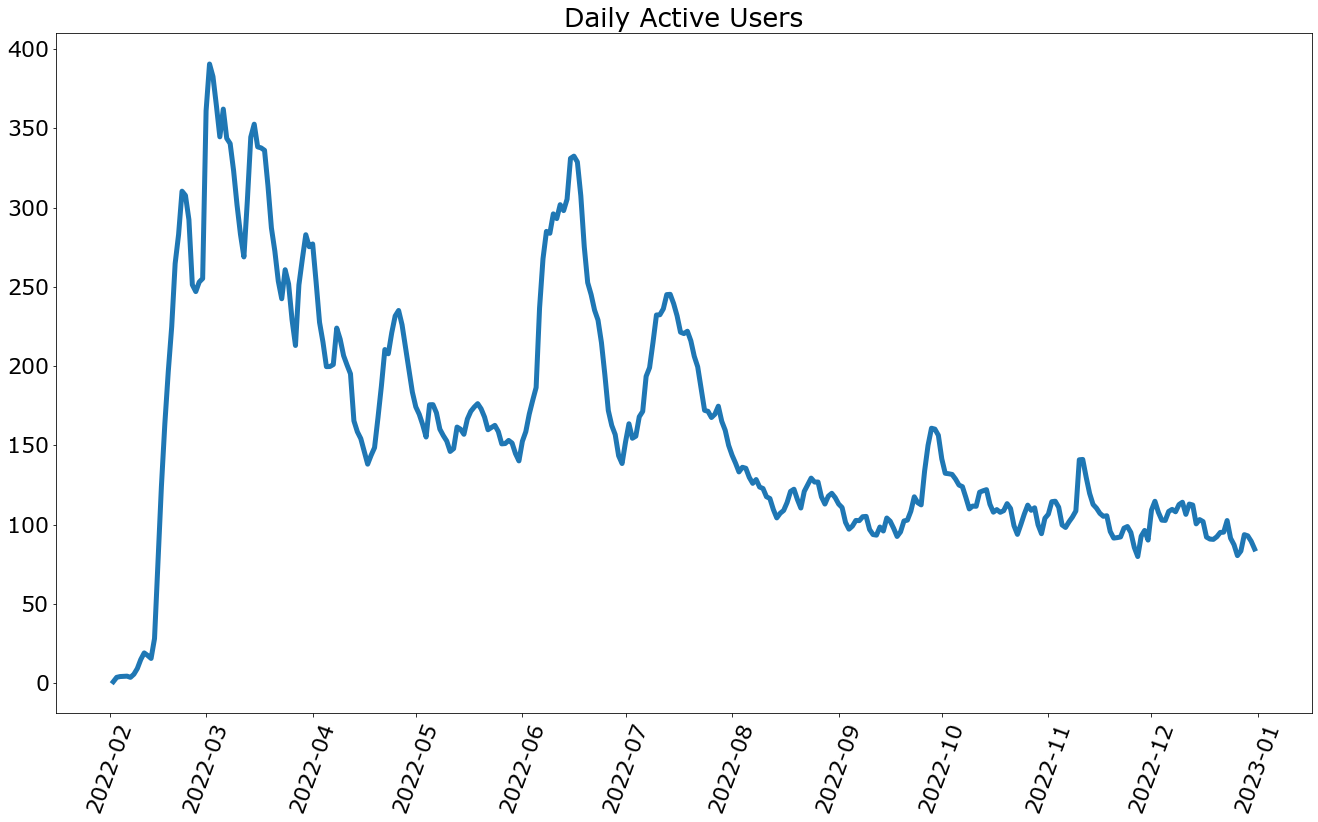

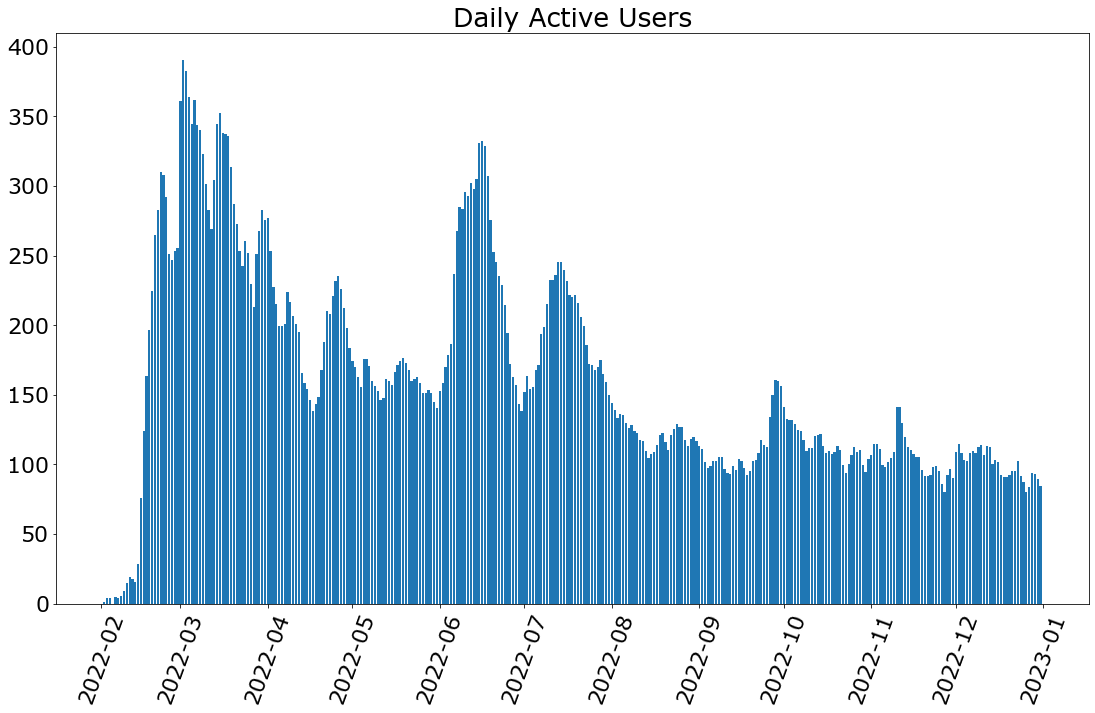

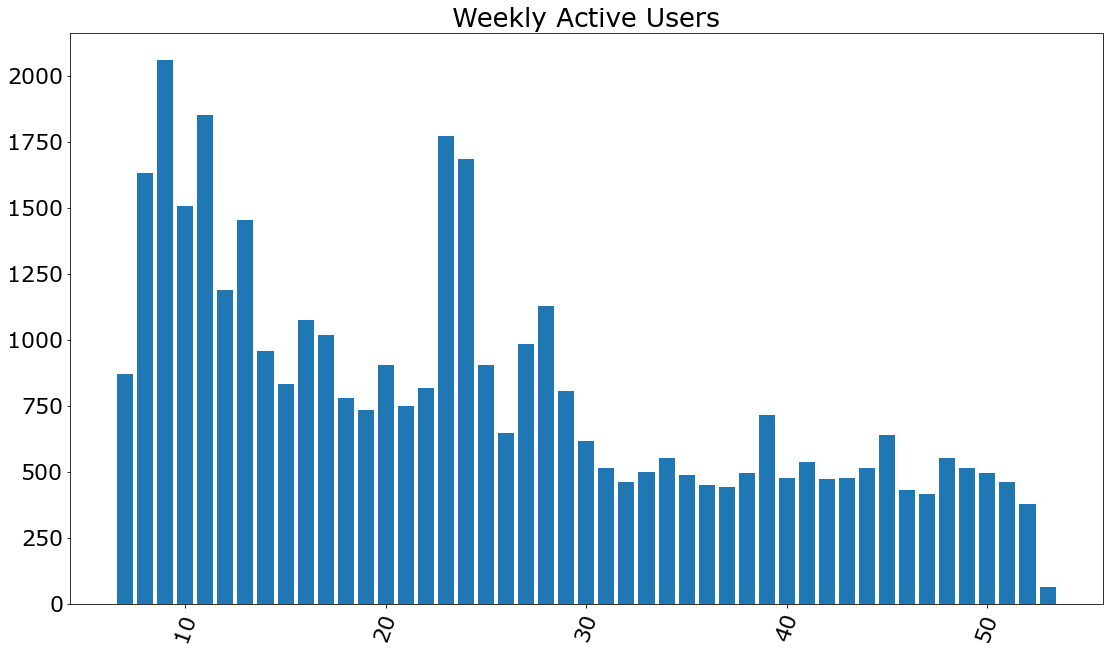

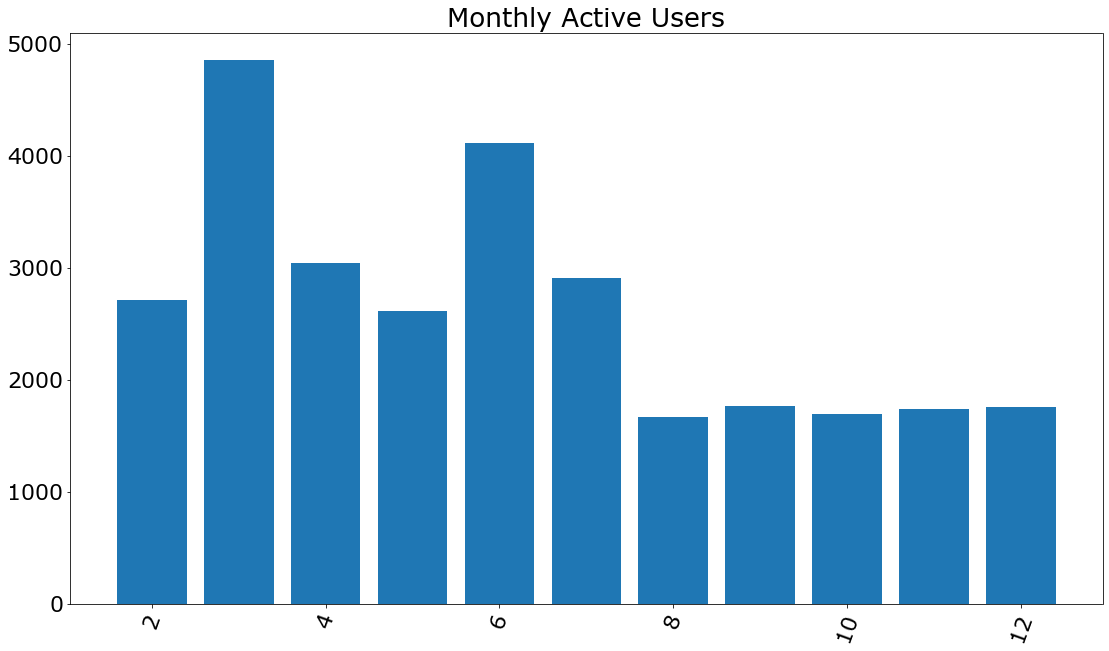

In [22]:

from flickplay.mongo import get_mongo_client, get_mongo_db_obj
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
import pandas as pd

conp = get_pymysql_con()
con  = get_alchemy_con()



query='''
SELECT
        date,
        count(distinct($user_id)) as DAU
FROM
        fpa.events
GROUP BY
        date
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        date ASC
'''

print(f'Fetching DAU.')
print(query)
df = pd.read_sql(query, conp)
com=4
print(f'Computing EMA: COM={com} days.')
df['EMA'] = df.DAU.ewm(com=com).mean()



query = '''SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        fpa.derived2
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC'''

print('\nFetching MAU.')
print(query)
mdd = pd.read_sql(query, conp)


query = '''SELECT 
	week,
	count(distinct($user_id)) as WAU
FROM
        fpa.derived2
GROUP BY
        week
-- HAVING 
--      date>="2022-09-01"
ORDER BY
		week ASC'''

print('\nFetching WAU.')
print(query)
wdd = pd.read_sql(query, conp)





import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(22.5, 12.5)

ax.plot(df.date, df.EMA, linewidth=5)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Daily Active Users')

plt.show()





import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(df.date, df.EMA, linewidth=5)
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Daily Active Users')

plt.show()

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(wdd.week, wdd.WAU, linewidth=5)
#ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Weekly Active Users')

plt.show()


import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(mdd.month, mdd.MAU, linewidth=5)
# ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Monthly Active Users')

plt.show()


Fetching MAU.
SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        ( select * from fpa.derived2 where anon_user=0) x
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC


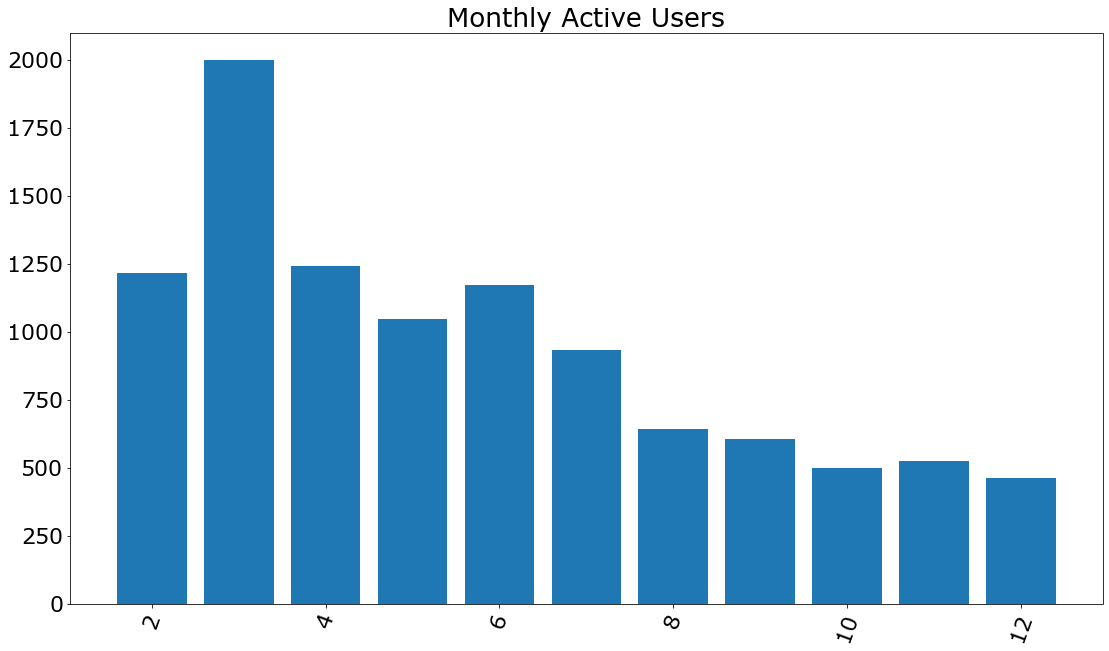

In [26]:


query = '''SELECT 
	month,
	count(distinct($user_id)) as MAU
FROM
        ( select * from fpa.derived2 where anon_user=0) x
GROUP BY
        month
-- HAVING 
--      date>="2022-09-01"
ORDER BY
        month ASC'''

print('\nFetching MAU.')
print(query)
mdd = pd.read_sql(query, conp)



import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(mdd.month, mdd.MAU, linewidth=5)
# ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=70)
plt.title('Monthly Active Users')

plt.show()

In [99]:
# for churn need the N_users_lost(month), and the N_users_existing(month)=MAU(month)
# so we need to find the N_users_lost(month) = | { user in month -1, not in month} |


from flickplay.mongo import get_mongo_client, get_mongo_db_obj
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
import pandas as pd

conp = get_pymysql_con()
con  = get_alchemy_con()

def get_next_month(month, diff=+1):
    if diff not in [-1, +1]:
        raise ValueError('diff must be +1, or -1')
        
    months = list(mdd.month.values)
    if diff == -1:
        months = list(reversed(months))
    
    if month == '2' and diff == -1:
        raise IndexError('Cant find a month smaller than 02')
    elif month == '12' and diff == +1:
        raise IndexError('Cant find a month larger than 12')
        
    i = months.index(month)
    return months[i+1]


def test_month_inc_func():
    MON = 4
    print(f'''The month one greater than "{MON}" is "{get_next_month(MON, diff=+1)}"''')
    MON=7
    print(f'''The month one less than "{MON}" is "{get_next_month(MON, diff=-1)}"''')


def get_users_of_month(month, con=conp):
    '''
    Return the set of user_id's in a given month (Jan == '01' ... Dec == '12').
    '''
    
    query = f"""SELECT 
    distinct($user_id) 
    FROM 
    fpa.derived2
    WHERE month='{month}'
    AND
    anon_user=0;"""
  #  --AND anon_user <> 1;"""
    
    df = pd.read_sql(query, con)
    return set(df['$user_id'])


def get_users_lost(month):
    '''
    Return the set of users who arent present this month but were around last month
    '''
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    #month_minus_one_set = get_users_of_month(month-1)
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_lost_users = { u for u in month_minus_one_set if u not in month_set } # could use set difference?
    
    return set_of_lost_users


def get_users_gained(month):
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_gained_users = { u for u in month_set if u not in month_minus_one_set }
    
    return set_of_gained_users
  
    
def get_churn(month):
    
    return len(get_users_lost(month))/len(get_users_of_month(get_next_month(month, diff=-1)))


def get_acquisition(month):
    
    return len(get_users_gained(month)) / len(get_users_of_month(get_next_month(month, diff=-1)))


conp = get_pymysql_con()


def main():

    test_month_inc_func()

    print('Let us calculate some churns, shall we?')

    conp = get_pymysql_con()

    raw_churns = dict()
    raw_acquisitions = dict()

    for month in mdd.month.iloc[1:].values:
        
        CHURN = get_churn(month)
        print('Churn for month', month, 'is', CHURN)
        raw_churns[month] = CHURN
        
        ACQ = get_acquisition(month)
        print('Acquisitions for month', month, 'is', ACQ)
        raw_acquisitions[month] = ACQ

        
# main()

In [30]:
def get_churn_and_acq():

    test_month_inc_func()

    print('Let us calculate some churns, shall we?')

    conp = get_pymysql_con()

    raw_churns = dict()
    raw_acquisitions = dict()

    for month in mdd.month.iloc[1:].values:
        
        CHURN = get_churn(month)
        print('Churn for month', month, 'is', CHURN)
        raw_churns[month] = CHURN
        
        ACQ = get_acquisition(month)
        print('Acquisitions for month', month, 'is', ACQ)
        raw_acquisitions[month] = ACQ

    return raw_churns, raw_acquisitions

churns, acquisitions = get_churn_and_acq()

The month one greater than "4" is "5"
The month one less than "7" is "6"
Let us calculate some churns, shall we?
Churn for month 3 is 0.3832236842105263
Acquisitions for month 3 is 1.0279605263157894
Churn for month 4 is 0.691
Acquisitions for month 4 is 0.3115
Churn for month 5 is 0.6140209508460919
Acquisitions for month 5 is 0.45769540692989524
Churn for month 6 is 0.620821394460363
Acquisitions for month 6 is 0.7392550143266475
Churn for month 7 is 0.7181895815542272
Acquisitions for month 7 is 0.515798462852263
Churn for month 8 is 0.6766595289079229
Acquisitions for month 8 is 0.36295503211991437
Churn for month 9 is 0.6209048361934477
Acquisitions for month 9 is 0.5631825273010921
Churn for month 10 is 0.6208609271523179
Acquisitions for month 10 is 0.44867549668874174
Churn for month 11 is 0.654
Acquisitions for month 11 is 0.704
Churn for month 12 is 0.6780952380952381
Acquisitions for month 12 is 0.5561904761904762


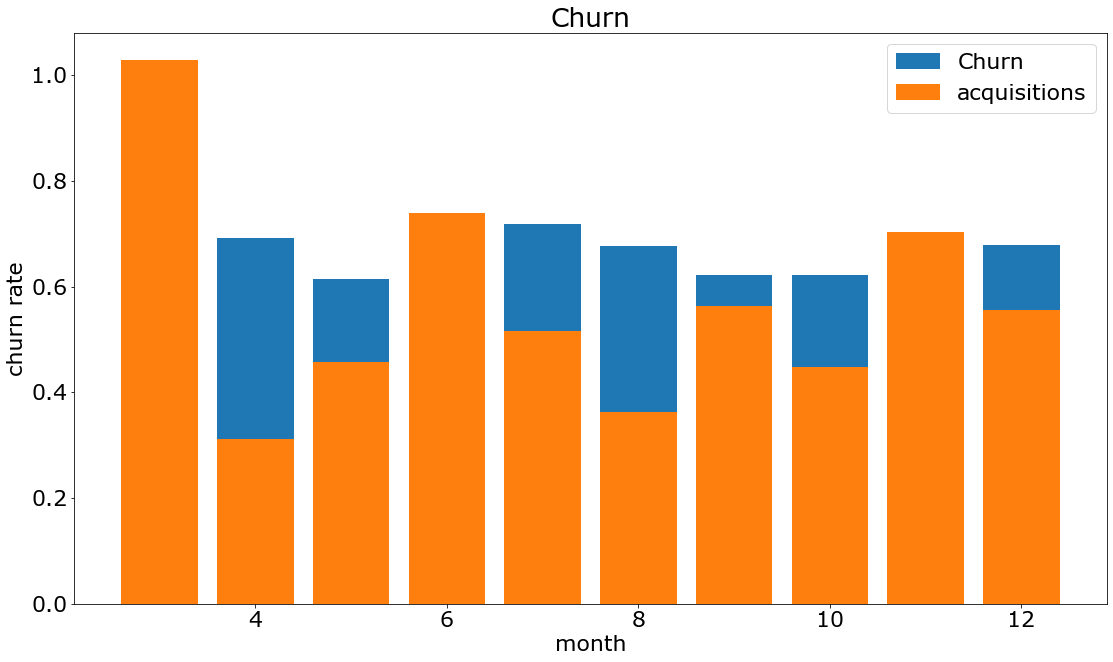

In [41]:
def get_churn_and_acq():

    test_month_inc_func()

    print('Let us calculate some churns, shall we?')

    conp = get_pymysql_con()

    raw_churns = dict()
    raw_acquisitions = dict()

    for month in mdd.month.iloc[1:].values:
        
        CHURN = get_churn(month)
        print('Churn for month', month, 'is', CHURN)
        raw_churns[month] = CHURN
        
        ACQ = get_acquisition(month)
        print('Acquisitions for month', month, 'is', ACQ)
        raw_acquisitions[month] = ACQ

    return raw_churns, raw_acquisitions

churns, acquisitions = get_churn_and_acq()

x,y = churns.keys(), churns.values()
ax,ay = acquisitions.keys(), acquisitions.values()

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
plt.title('Churn')
plt.xlabel('month')
plt.ylabel('churn rate')
plt.bar(x,y, label='Churn')


ax,ay = acquisitions.keys(), acquisitions.values()

plt.bar(ax, ay, label = 'acquisitions')

plt.legend()

In [47]:
churns, acquisitions = get_churn_and_acq()

The month one greater than "4" is "5"
The month one less than "7" is "6"
Let us calculate some churns, shall we?
Churn for month 3 is 0.3832236842105263
Acquisitions for month 3 is 1.0279605263157894
Churn for month 4 is 0.691
Acquisitions for month 4 is 0.3115
Churn for month 5 is 0.6140209508460919
Acquisitions for month 5 is 0.45769540692989524
Churn for month 6 is 0.620821394460363
Acquisitions for month 6 is 0.7392550143266475
Churn for month 7 is 0.7181895815542272
Acquisitions for month 7 is 0.515798462852263
Churn for month 8 is 0.6766595289079229
Acquisitions for month 8 is 0.36295503211991437
Churn for month 9 is 0.6209048361934477
Acquisitions for month 9 is 0.5631825273010921
Churn for month 10 is 0.6208609271523179
Acquisitions for month 10 is 0.44867549668874174
Churn for month 11 is 0.654
Acquisitions for month 11 is 0.704
Churn for month 12 is 0.6780952380952381
Acquisitions for month 12 is 0.5561904761904762


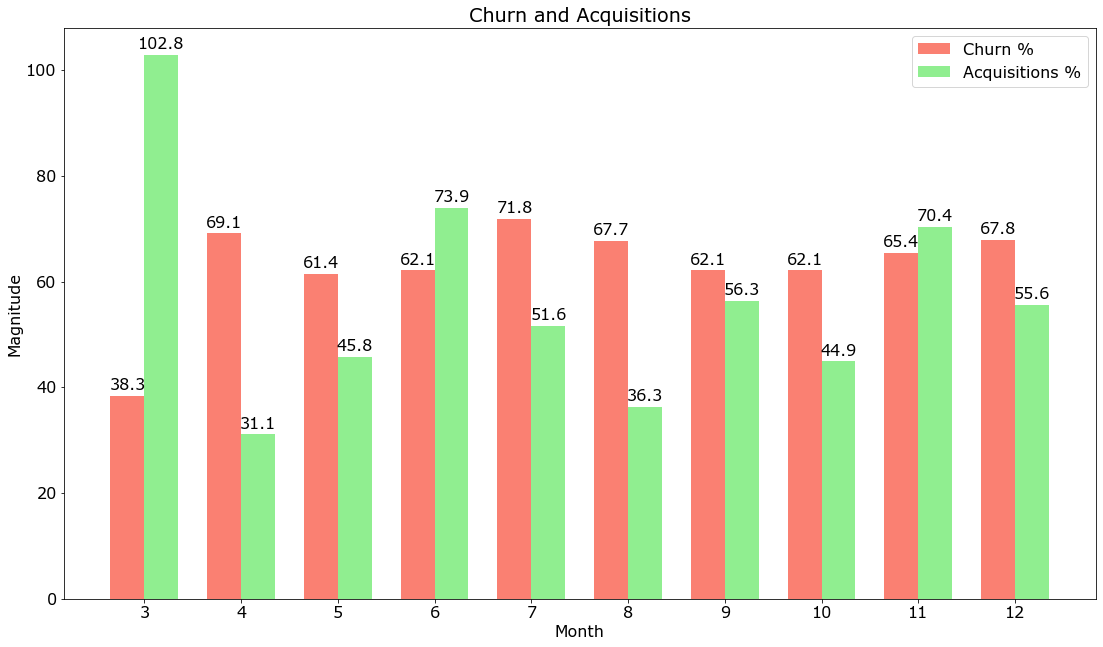

In [83]:



import matplotlib.pyplot as plt
import numpy as np


cx,cy = churns.keys(), [ round(c*100,1) for c in churns.values() ]
ax,ay = acquisitions.keys(), [ round(a*100,1) for a in acquisitions.values() ]


labels = list(cx)
churn_vals = cy
acquisition_vals = ay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_vals, width, label='Churn %', color='salmon')
rects2 = ax.bar(x + width/2, acquisition_vals, width, label='Acquisitions %', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Magnitude')
ax.set_xlabel('Month')
ax.set_title('Churn and Acquisitions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# font = {'family' : 'verdana',
#        # 'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

# fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()
plt.savefig('/Users/allen/Desktop/churn0.jpg', format='jpg')
plt.show()



<BarContainer object of 10 artists>

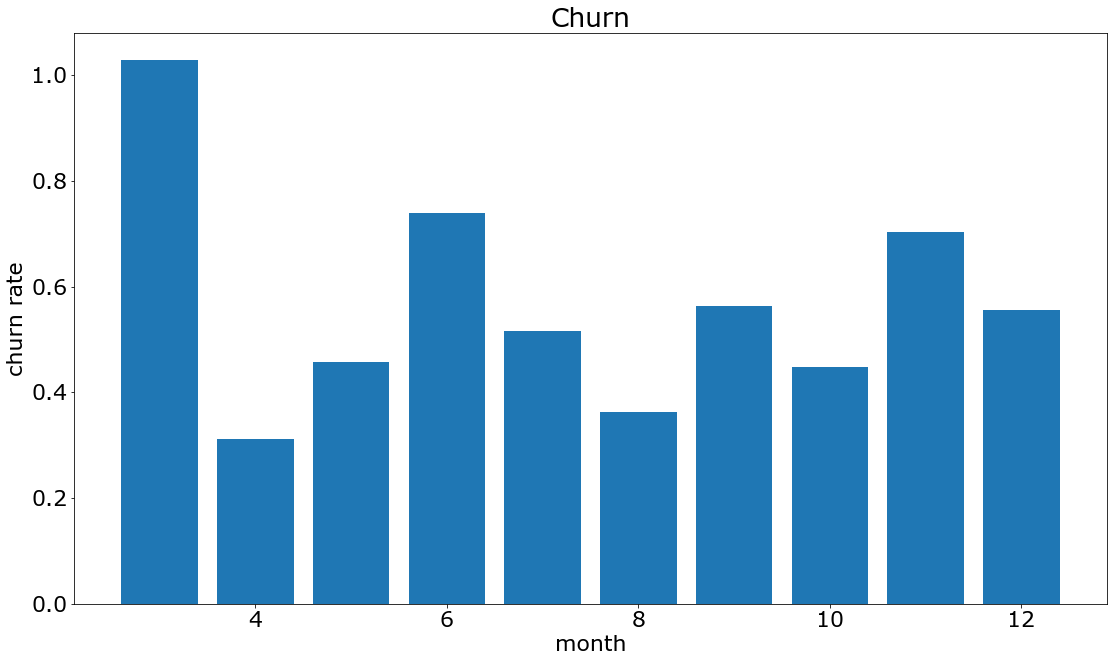

In [40]:
x,y = acquisitions.keys(), acquisitions.values()


font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
plt.title('Churn')
plt.xlabel('month')
plt.ylabel('churn rate')
plt.bar(x,y)

In [14]:
mdd.month

0      2
1      3
2      4
3      5
4      6
5      7
6      8
7      9
8     10
9     11
10    12
Name: month, dtype: int64

In [77]:
gained = []
loss = []
ugained = []
ulost = []

for month in list(mdd.month)[1:]:
    gain = get_users_gained(month)
    lost = get_users_lost(month)
    print(month, 'gained:', len(gain), 'lost:', len(lost))
    ugained.append(gain)
    ulost.append(lost)
    gained.append(len(gain))
    loss.append(len(lost))
    


3 gained: 1250 lost: 466
4 gained: 623 lost: 1382
5 gained: 568 lost: 762
6 gained: 774 lost: 650
7 gained: 604 lost: 841
8 gained: 339 lost: 632
9 gained: 361 lost: 398
10 gained: 271 lost: 375
11 gained: 352 lost: 327
12 gained: 292 lost: 356


<BarContainer object of 10 artists>

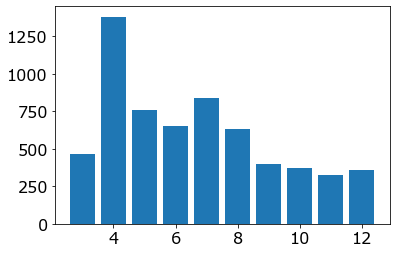

In [80]:
plt.bar(list(mdd.month)[1:], loss)

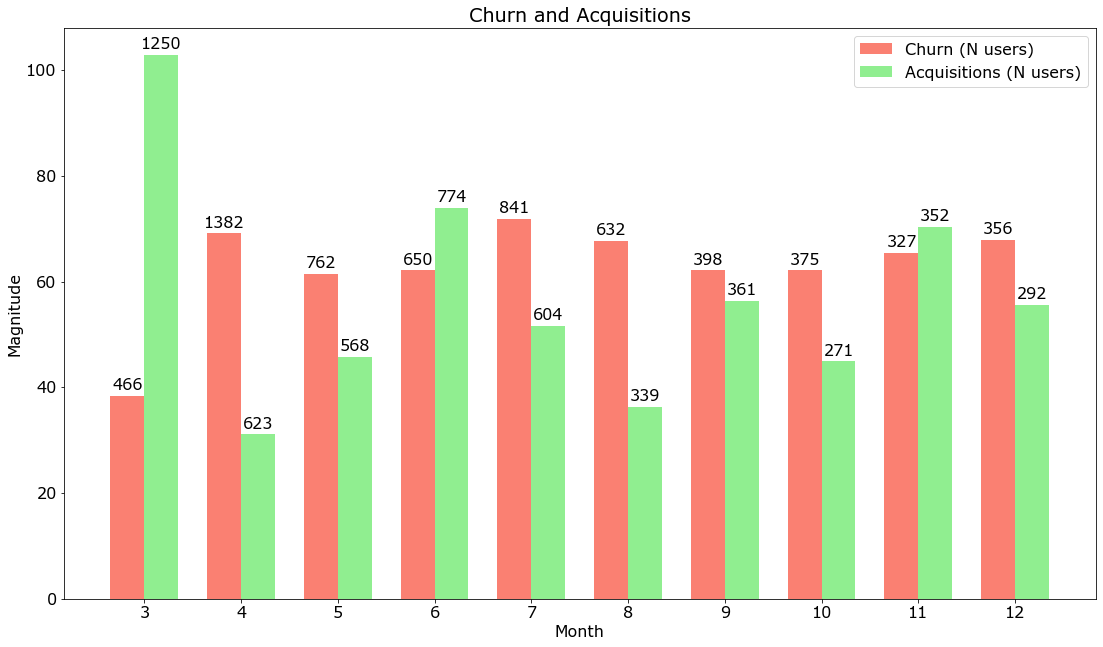

In [82]:
import matplotlib.pyplot as plt
import numpy as np


cx,cy = churns.keys(), [ round(c*100,1) for c in churns.values() ]
ax,ay = acquisitions.keys(), [ round(a*100,1) for a in acquisitions.values() ]


labels = list(cx)
churn_vals = cy
acquisition_vals = ay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_vals, width, label='Churn (N users)', color='salmon')
rects2 = ax.bar(x + width/2, acquisition_vals, width, label='Acquisitions (N users)', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Magnitude')
ax.set_xlabel('Month')
ax.set_title('Churn and Acquisitions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, labels=[str(x) for x in loss], padding=3)
ax.bar_label(rects2, labels=[str(x) for x in gained], padding=3)

# font = {'family' : 'verdana',
#        # 'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

# fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()
plt.savefig('/Users/allen/Desktop/churn.jpg', format='jpg')
plt.show()


In [84]:
def get_weekly_recipes():
    for i in range(7):
        print('Home run inn pizza.')

In [86]:
get_weekly_recipes()

Home run inn pizza.
Home run inn pizza.
Home run inn pizza.
Home run inn pizza.
Home run inn pizza.
Home run inn pizza.
Home run inn pizza.


In [100]:
print('l1')
l1=get_users_lost(3)
print(len(l1))
print('l2')
print('u2')
u2 = get_users_of_month(2)
print(len(u2))
print('u3')
u3 = get_users_of_month(3)
print(len(u3))
l2={ u for u in u2 if u not in u3 }
print(len(l2))

l1
466
l2
u2
1216
u3
2000
466


In [101]:
query = """
SELECT event, $user_id
FROM fpa.derived2
WHERE event='profile_wallet__connect_suc'
"""

wallet_con_users = pd.read_sql(query, conp)

wallet_con_uset = set(wallet_con_users['$user_id'])

In [105]:

months = list(range(3,13))
lost_users = []
web3_lost_users = []
frac_web3_lost = []


for mo in months:
    lost = get_users_lost(mo)
    web3_lost = { u for u in lost if u in wallet_con_uset }
    frac = len(web3_lost)/len(lost)
    lost_users.append(len(lost))
    web3_lost_users.append(len(web3_lost))
    frac_web3_lost.append(frac)
    print(mo, len(lost), len(web3_lost), frac*100)

3 466 3 0.6437768240343348
4 1382 5 0.361794500723589
5 762 14 1.837270341207349
6 650 33 5.076923076923077
7 841 69 8.204518430439952
8 632 187 29.58860759493671
9 398 72 18.090452261306535
10 375 101 26.93333333333333
11 327 110 33.63914373088685
12 356 130 36.51685393258427


In [151]:
# for churn need the N_users_lost(month), and the N_users_existing(month)=MAU(month)
# so we need to find the N_users_lost(month) = | { user in month -1, not in month} |


from flickplay.mongo import get_mongo_client, get_mongo_db_obj
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
import pandas as pd

conp = get_pymysql_con()
con  = get_alchemy_con()

print('Getting Wallet Con Set')
query = """
SELECT event, $user_id
FROM fpa.derived2
WHERE event='profile_wallet__connect_suc'
"""

wallet_con_users = pd.read_sql(query, conp)

wallet_con_uset = set(wallet_con_users['$user_id'])



def get_next_month(month, diff=+1):
    if diff not in [-1, +1]:
        raise ValueError('diff must be +1, or -1')
        
    months = list(mdd.month.values)
    if diff == -1:
        months = list(reversed(months))
    
    if month == '2' and diff == -1:
        raise IndexError('Cant find a month smaller than 02')
    elif month == '12' and diff == +1:
        raise IndexError('Cant find a month larger than 12')
        
    i = months.index(month)
    return months[i+1]


def test_month_inc_func():
    MON = 4
    print(f'''The month one greater than "{MON}" is "{get_next_month(MON, diff=+1)}"''')
    MON=7
    print(f'''The month one less than "{MON}" is "{get_next_month(MON, diff=-1)}"''')


def get_users_of_month(month, con=conp, w3set=False):
    '''
    Return the set of user_id's in a given month (Jan == '01' ... Dec == '12').
    '''
    
    query = f"""SELECT 
    distinct($user_id) 
    FROM 
    fpa.derived2
    WHERE month='{month}'
    AND
    anon_user=0;"""
  #  --AND anon_user <> 1;"""
    
    df = pd.read_sql(query, con)
    if w3set:
        return { u for u in set(df['$user_id']) if u in wallet_con_uset }
    return set(df['$user_id'])


def get_users_lost(month, w3set=False):
    '''
    Return the set of users who arent present this month but were around last month
    '''
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    #month_minus_one_set = get_users_of_month(month-1)
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_lost_users = { u for u in month_minus_one_set if u not in month_set } # could use set difference?
    
    if w3set:
        return { u for u in set_of_lost_users if u in wallet_con_uset }
    return set_of_lost_users


def get_users_gained(month, w3set=False):
    
    if int(month)==2:
        raise ValueError('Cant compute users lost for month = min(month) = \'02\'')
    
    month_minus_one_set = get_users_of_month(get_next_month(month, diff=-1))
    month_set = get_users_of_month(month)
    
    set_of_gained_users = { u for u in month_set if u not in month_minus_one_set }
    
    if w3set:
        return { u for u in set_of_gained_users if u in wallet_con_uset }
    return set_of_gained_users
  
    
def get_churn(month, w3set=False):
    
    return len(get_users_lost(month, w3set=w3set))/len(get_users_of_month(get_next_month(month, diff=-1), w3set=w3set))


def get_acquisition(month, w3set=False):
    
    return len(get_users_gained(month, w3set=w3set)) / len(get_users_of_month(get_next_month(month, diff=-1), w3set=w3set))




Getting Wallet Con Set


The month one greater than "4" is "5"
The month one less than "7" is "6"
Let us calculate some churns, shall we?
Churn for month 3 is 0.1
Acquisitions for month 3 is 0.9333333333333333
Churn for month 4 is 0.09090909090909091
Acquisitions for month 4 is 0.7818181818181819
Churn for month 5 is 0.15053763440860216
Acquisitions for month 5 is 0.5591397849462365
Churn for month 6 is 0.25190839694656486
Acquisitions for month 6 is 0.7786259541984732
Churn for month 7 is 0.345
Acquisitions for month 7 is 1.09
Churn for month 8 is 0.5358166189111748
Acquisitions for month 8 is 0.12893982808022922
Churn for month 9 is 0.34782608695652173
Acquisitions for month 9 is 0.5652173913043478
Churn for month 10 is 0.4007936507936508
Acquisitions for month 10 is 0.2896825396825397
Churn for month 11 is 0.49107142857142855
Acquisitions for month 11 is 0.5848214285714286
Churn for month 12 is 0.5306122448979592
Acquisitions for month 12 is 0.363265306122449


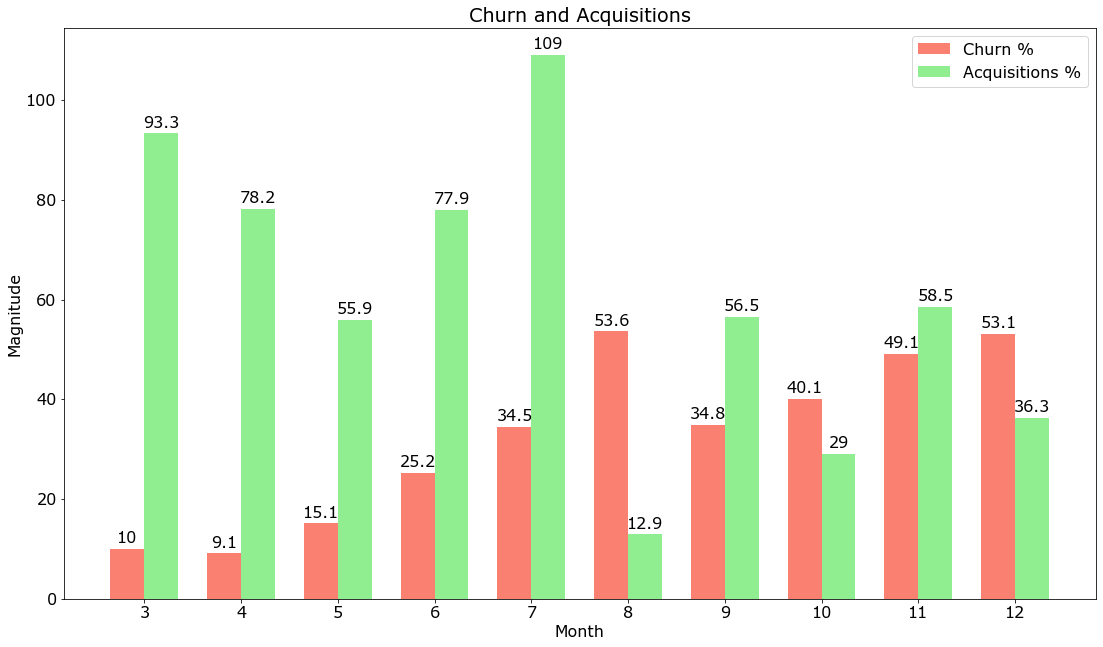

In [111]:
def get_churn_and_acq(w3set=False):

    test_month_inc_func()

    print('Let us calculate some churns, shall we?')

    conp = get_pymysql_con()

    raw_churns = dict()
    raw_acquisitions = dict()

    for month in mdd.month.iloc[1:].values:
        
        CHURN = get_churn(month,w3set=w3set)
        print('Churn for month', month, 'is', CHURN)
        raw_churns[month] = CHURN
        
        ACQ = get_acquisition(month, w3set=w3set)
        print('Acquisitions for month', month, 'is', ACQ)
        raw_acquisitions[month] = ACQ

    return raw_churns, raw_acquisitions

churns, acquisitions = get_churn_and_acq(w3set=True)


import matplotlib.pyplot as plt
import numpy as np


cx,cy = churns.keys(), [ round(c*100,1) for c in churns.values() ]
ax,ay = acquisitions.keys(), [ round(a*100,1) for a in acquisitions.values() ]


labels = list(cx)
churn_vals = cy
acquisition_vals = ay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_vals, width, label='Churn %', color='salmon')
rects2 = ax.bar(x + width/2, acquisition_vals, width, label='Acquisitions %', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Magnitude')
ax.set_xlabel('Month')
ax.set_title('Churn and Acquisitions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# font = {'family' : 'verdana',
#        # 'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

# fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()
plt.savefig('/Users/allen/Desktop/churn0.jpg', format='jpg')
plt.show()



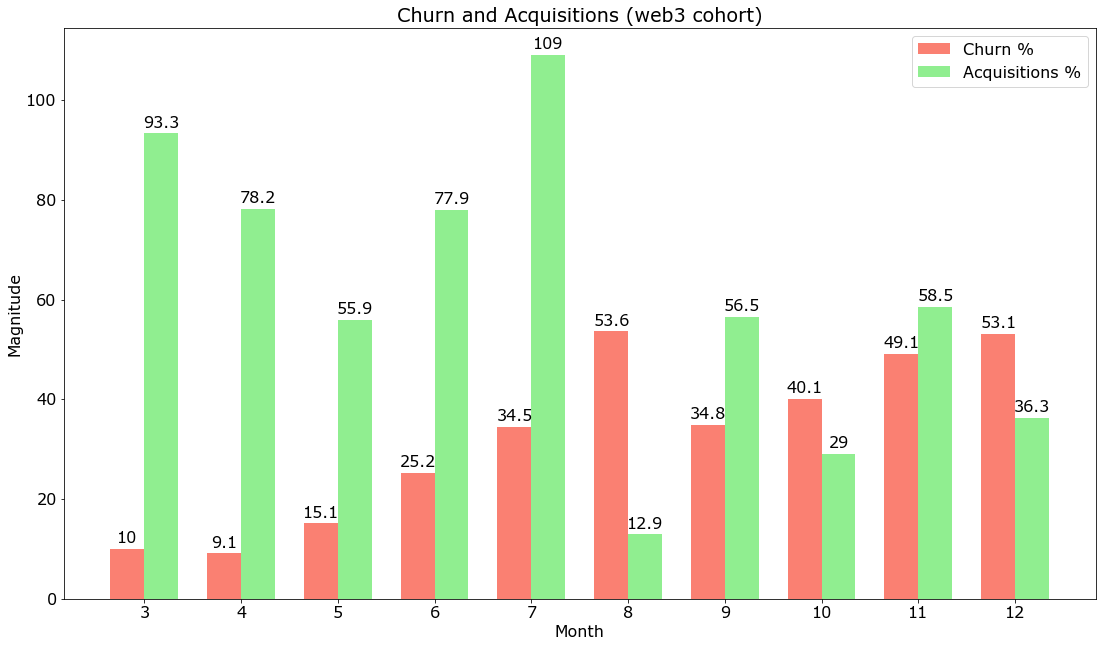

In [112]:

import matplotlib.pyplot as plt
import numpy as np


cx,cy = churns.keys(), [ round(c*100,1) for c in churns.values() ]
ax,ay = acquisitions.keys(), [ round(a*100,1) for a in acquisitions.values() ]


labels = list(cx)
churn_vals = cy
acquisition_vals = ay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_vals, width, label='Churn %', color='salmon')
rects2 = ax.bar(x + width/2, acquisition_vals, width, label='Acquisitions %', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Magnitude')
ax.set_xlabel('Month')
ax.set_title('Churn and Acquisitions (web3 cohort)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# font = {'family' : 'verdana',
#        # 'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

# fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()
plt.savefig('/Users/allen/Desktop/churn0.jpg', format='jpg')
plt.show()



3 gained: 28 lost: 3
4 gained: 43 lost: 5
5 gained: 52 lost: 14
6 gained: 102 lost: 33
7 gained: 218 lost: 69
8 gained: 45 lost: 187
9 gained: 117 lost: 72
10 gained: 73 lost: 101
11 gained: 131 lost: 110
12 gained: 89 lost: 130


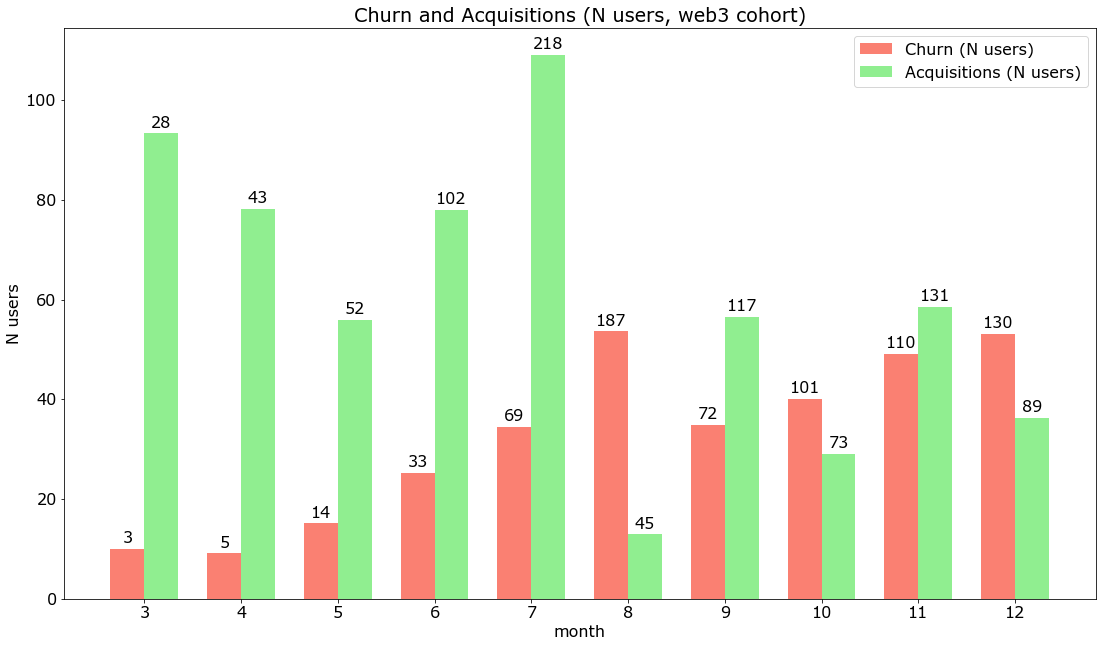

In [152]:
gained = []
loss = []
ugained = []
ulost = []

for month in list(mdd.month)[1:]:
    gain = get_users_gained(month, w3set=True)
    lost = get_users_lost(month, w3set=True)
    print(month, 'gained:', len(gain), 'lost:', len(lost))
    ugained.append(gain)
    ulost.append(lost)
    gained.append(len(gain))
    loss.append(len(lost))


import matplotlib.pyplot as plt
import numpy as np


cx,cy = churns.keys(), [ round(c*100,1) for c in churns.values() ]
ax,ay = acquisitions.keys(), [ round(a*100,1) for a in acquisitions.values() ]


labels = list(cx)
churn_vals = cy
acquisition_vals = ay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_vals, width, label='Churn (N users)', color='salmon')
rects2 = ax.bar(x + width/2, acquisition_vals, width, label='Acquisitions (N users)', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Magnitude')
ax.set_xlabel('Month')
ax.set_title('Churn and Acquisitions (N users, web3 cohort)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, labels=[str(x) for x in loss], padding=3)
ax.bar_label(rects2, labels=[str(x) for x in gained], padding=3)

# font = {'family' : 'verdana',
#        # 'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

# fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)
# fig.tight_layout()
plt.xlabel('month')
plt.ylabel('N users')
plt.savefig('/Users/allen/Desktop/churn.jpg', format='jpg')
plt.show()


Text(0, 0.5, 'N users')

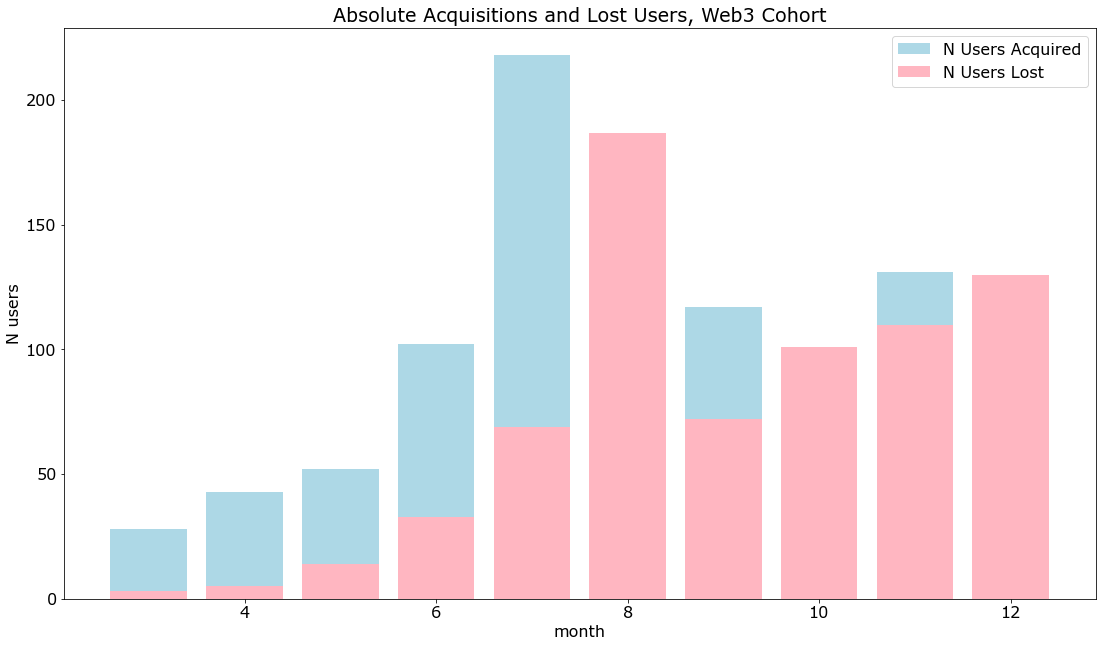

In [153]:

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
# plt.legend()
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
x = np.arange(len(months))  # the label locations
width = 0.35 

ax.bar(months, [ len(x) for x in ugained ], label='N Users Acquired', color='lightblue')
ax.bar(months, [ len(x) for x in ulost  ], label='N Users Lost', color='lightpink')
ax.legend()
plt.title('Absolute Acquisitions and Lost Users, Web3 Cohort')
plt.xlabel('month')
plt.ylabel('N users')
# fig.tight_layout()
